In [1]:
from numpy import zeros, complex128, real, arctan2, sqrt, pi, array, amin
from numpy.linalg import norm

In [2]:
a = zeros((3, 3), dtype=complex128)
a[0, 0] = 1.0 + 1.0j
a[1, 1] = 1.0 - 1.0j
a[2, 2] = 1.0 + 1.0j
print(a)

[[1.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 1.-1.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+1.j]]


In [3]:
a_real = real(a)
print(a_real)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [4]:
arctan2(1, -sqrt(3)) * 180 / pi

150.00000000000003

In [5]:
a = array([1, 2, 3])
print(a[(a > 2) | (a < 1)])


[3]


In [6]:
a = array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
print(a)
b = norm(a, axis=0)
print(b)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[1.73205081 3.46410162 5.19615242]


In [7]:
str(10).zfill(2)

'10'

In [8]:
import pandas as pd

t = pd.to_datetime("2018-01-01T00:00:00.000000000Z")
t.strftime("%Y-%m-%dT%H:%M:%S.%f")

'2018-01-01T00:00:00.000000'

In [9]:
df = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6]})
array(df["a"])

array([1, 2, 3])

In [10]:
df = pd.DataFrame({"time": pd.to_datetime(["2020-01-01T00:00:00", "2020-01-01T00:00:00", "2020-01-01T00:00:00"]), "x": [4, 5, 6]})
starttimes = df["time"].tolist()
amin(starttimes)

Timestamp('2020-01-01 00:00:00')

In [11]:
a = [1, 2, 3]
a.index(2)

1

In [12]:
from numpy import cov

a = array([1+1j, 2+2j, 3+3j])
b = array([1+1j, 2+2j, 3+3j])

cov(a, b)

array([[2.+0.j, 2.+0.j],
       [2.+0.j, 2.+0.j]])

In [13]:
import pandas as pd

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12]
}
df = pd.DataFrame(data)

print(df)

# Selecting the first two rows and transposing
selected_rows = df.iloc[0:2]

# Concatenating the rows along the column axis
result = pd.concat([selected_rows], axis=1)

print(result)

   A  B   C
0  1  5   9
1  2  6  10
2  3  7  11
3  4  8  12
   A  B   C
0  1  5   9
1  2  6  10


In [14]:
from numpy import cross, array, arcsin, pi, sqrt
from numpy.linalg import norm

a = array([1, -sqrt(3), 0])
b = array([1, 0, 0])

arcsin(norm(cross(a, b))/norm(a)/norm(b))/pi*180

60.00000000000001

In [15]:
from numpy import array, row_stack, mean, arctan2, sqrt, pi

a = array([1, 2, 3])
b = a.copy()

c = row_stack((a, b))
print(c)
mean_c = mean(c, axis=1)
print(mean_c)

arctan2(sqrt(3), 1)/pi*180

[[1 2 3]
 [1 2 3]]
[2. 2.]


60.0

In [2]:
from numpy import array, row_stack, mean, arctan2, sqrt, pi, cross
from utils_pol import get_mean_strike

strikes = array((20, 165))
mean_strike = get_mean_strike(strikes)
print(f"{mean_strike:.20f}")

2.49999999999999156231


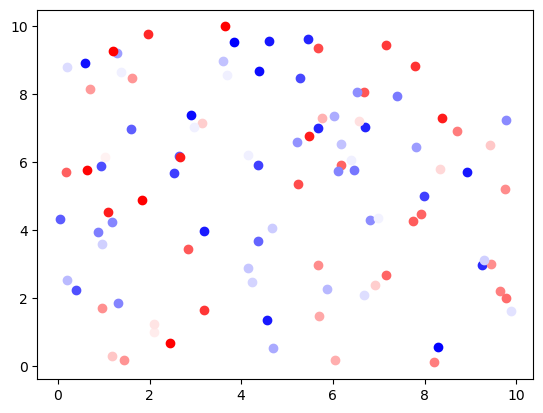

In [28]:
from numpy import array, linspace
from numpy.random import randn, uniform, seed
from matplotlib import colormaps
from matplotlib.pyplot import plot, Normalize, cm


seed(0)  # For reproducibility
n_points = 100
x = uniform(0, 10, n_points)
y = uniform(0, 10, n_points)
angle = uniform(0, 360, n_points)  # Angles in degrees
amplitude = uniform(-5, 5, n_points)  # Amplitude values

norm = Normalize(amplitude.min(), amplitude.max())
colors = cm.bwr(norm(amplitude))

for i in range(n_points):
    plot(x[i], y[i], "o", color=colors[i])


In [1]:
from scipy.signal import unit_impulse

a = unit_impulse(10, "mid")
print(a)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
from re import search, split
parent = "b-16-00-12-23-a"

match = search(r"(\d{2})-(\d{2})-(\d{2})-(\d{2})", parent)
match.group(0)
match.group(1)

fields = split("\d{2}-\d{2}-\d{2}-\d{2}", parent)
fields

['b-', '-a']

In [13]:
a = set([1, 2, 3])
b = set([1, 2, 3, 4])
c = list(a & b)
print(c)

[1, 2, 3]
